<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Arka, Jinkun, Rawal, Rohan, Sheng-Yu

## Q6 Data Augmentation [Extra Credit](20 points)

**Note: We would recommend finishing Question 4 (pytorch) before attempting this question**

**Please include all the write up answers below to the PDF submission. For the questions that need code, you need to include the screenshot of code to the PDF submission to get points.**

Data augmentation is a technique often used to boost the performance of neural networks on visual learning tasks such as classification. The method relies on applying transforms to input examples that change the input, but not enough to change the class label. In this problem, we will use the NIST36 dataset to evaluate the improvement we can get from augmentation quantitatively.

The augmentations you will implement will look something like 

![](figures/sample_aug1.png)
![](figures/sample_aug2.png)

### Q6.1 Implementing Data Transformations (10 pts, code + write-up)

In [2]:
import numpy as np
import cv2
import scipy.io
from scipy import ndimage
from ipynb.fs.defs.q1 import *

#### Q6.1.1 Implement Data Translation (3 pts, code)

First, you will implement a method to apply a translation to an image given an amount to translate in each direction. You are free to implement this however you like. The translated image should be the same size as the original, and the gaps induced by the translation should be filled with the appropriate values.  

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

In [36]:
def apply_random_translation(im, dx, dy):
    '''
    Applies a random translation to the image, described by dx, and dy.
    
    [input]
    * im -- image to be translation
    * dx -- the number of pixels the image should be translated in the x direction
    * dy -- the number of pixesl the image should be translated in the y direction
    [output]
    * im -- the translated image
    '''
    # YOUR CODE HERE
    sequence = np.array([dx, dy, 3])
    im_translated = ndimage.shift(im, sequence, mode='nearest')
    # raise NotImplementedError

    return im_translated

#### Q6.1.2 Implement Data Rotation (2 pts, code)

Next, you will implement a method to apply rotation to an image. You are allowed to use library methods for this, we suggest using scipy.ndimage.rotate. However, you will need to ensure that the output of your method is a reasonable looking image - to do this, you will need to fill in any gaps induced by the rotation.

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

In [27]:
def apply_random_rotation(im, angle):
    '''
    Applies a random rotation to the image of angle degrees.
    
    [input]
    * im -- image to be rotation
    * angle -- the number of degrees for the image to be rotated.
    
    [output]
    * im -- rotated image.
    '''
    # YOUR CODE HERE
    from PIL import Image
    from scipy import misc
    
    # rotated_im = misc.ascent()
    rotated_im = ndimage.rotate(im, angle, reshape=False, mode='nearest')
    # raise NotImplementedError

    return rotated_im

#### Q6.1.3 Visualize transformations (5 pts, write-up)

Visualize 5 different data examples, with randomly selected values for dx, dy and angle. Be sure to label each image with the associated augmentation parameters, and visualize all 5 images on the same plot.

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

input shape =  (1024,)


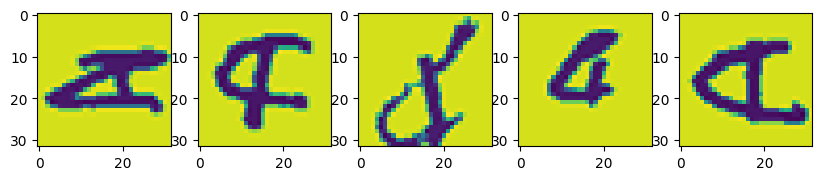

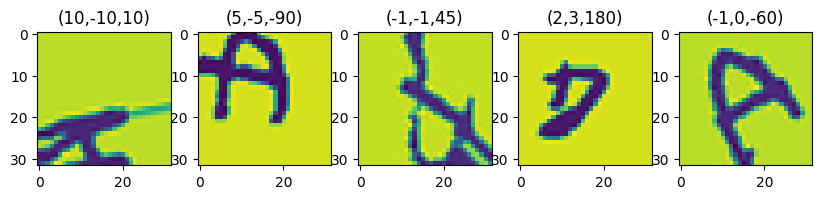

In [55]:
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

# YOUR VISUALIZATION CODE HERE
import matplotlib.pyplot as plt
dx1 = 10
dy1 = -10
dx2 = 5
dy2 = -5
dx3 = -1
dy3 = -1
dx4 = 2
dy4 = 3
dx5 = -1
dy5 = 0
angle1 = 10
angle2 = -90
angle3 = 45
angle4 = 180
angle5 = -60

print("input shape = ", train_x[0].shape)

image1 = train_x[0].reshape(32,32, -1)
image2 = train_x[1].reshape(32,32, -1)
image3 = train_x[2].reshape(32,32, -1)
image4 = train_x[3].reshape(32,32, -1)
image5 = train_x[4].reshape(32,32, -1)

fig2 = plt.figure(figsize=(10, 5))
ax1, ax2, ax3, ax4, ax5 = fig2.subplots(1, 5)

ax1.imshow(image1)
ax2.imshow(image2)
ax3.imshow(image3)
ax4.imshow(image4)
ax5.imshow(image5)
plt.show()

image1mod = apply_random_translation(image1, dx1, dy1)
image1mod = apply_random_rotation(image1mod, angle1)
image2mod = apply_random_translation(image2, dx2, dy2)
image2mod = apply_random_rotation(image2mod, angle2)
image3mod = apply_random_translation(image3, dx3, dy3)
image3mod = apply_random_rotation(image3mod, angle3)
image4mod = apply_random_translation(image4, dx4, dy4)
image4mod = apply_random_rotation(image4mod, angle4)
image5mod = apply_random_translation(image5, dx5, dy5)
image5mod = apply_random_rotation(image5mod, angle5)

fig = plt.figure(figsize=(10, 5))
ax1, ax2, ax3, ax4, ax5 = fig.subplots(1, 5)

ax1.imshow(image1mod)
ax1.title.set_text('(10,-10,10)')
ax2.imshow(image2mod)
ax2.title.set_text('(5,-5,-90)')
ax3.imshow(image3mod)
ax3.title.set_text('(-1,-1,45)')
ax4.imshow(image4mod)
ax4.title.set_text('(2,3,180)')
ax5.imshow(image5mod)
ax5.title.set_text('(-1,0,-60)')
# fig.set_layout_engine('tight')
# image1mod = np.expand_dims(image1mod, axis=0)
# plt.imshow(image1mod)

plt.show()

### Q6.2 Implementing Data Transformations (10 pts, code + write-up)

Next, you will use your transformations to modify examples in the training loop. Integrate your code for the data augmentations into the training loop such that each example received by the model has a random translation and rotation applied to it. Be sure to set the ranges for the parameters such that the augmentations keep the examples reasonable-looking. Train a model with your augmentations, and plot the accuracy vs. epochs compared to a model trained with no augmentations. (You can do this by setting the range of augmentation parameters to 0). What do you notice about the performance of the model with augmentations vs. without? Explain any notable differences you find. 

You may use any size neural network you choose, but make sure you use the same size network for evaluating the baseline performance (no augmentations) vs the performance with augmentation.

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

itr: 00 	 loss: 10.53 	 acc : 0.08
Validation accuracy:  0.1825
Validation accuracy:  0.33111111111111113
itr: 02 	 loss: 8.84 	 acc : 0.37
Validation accuracy:  0.4186111111111111
Validation accuracy:  0.4625
itr: 04 	 loss: 7.26 	 acc : 0.49
Validation accuracy:  0.49805555555555553
Validation accuracy:  0.5225
itr: 06 	 loss: 6.13 	 acc : 0.55
Validation accuracy:  0.5461111111111111
Validation accuracy:  0.5666666666666667
itr: 08 	 loss: 5.33 	 acc : 0.60
Validation accuracy:  0.5852777777777778
Validation accuracy:  0.5986111111111111
itr: 10 	 loss: 4.78 	 acc : 0.63
Validation accuracy:  0.6105555555555555
Validation accuracy:  0.6208333333333333
itr: 12 	 loss: 4.37 	 acc : 0.64
Validation accuracy:  0.63
Validation accuracy:  0.6383333333333333
itr: 14 	 loss: 4.07 	 acc : 0.66
Validation accuracy:  0.6455555555555555
Validation accuracy:  0.6536111111111111
itr: 16 	 loss: 3.84 	 acc : 0.67
Validation accuracy:  0.6561111111111111
Validation accuracy:  0.6633333333333333
itr

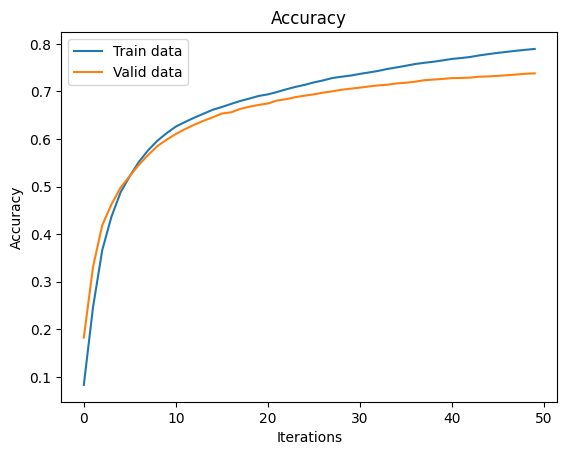

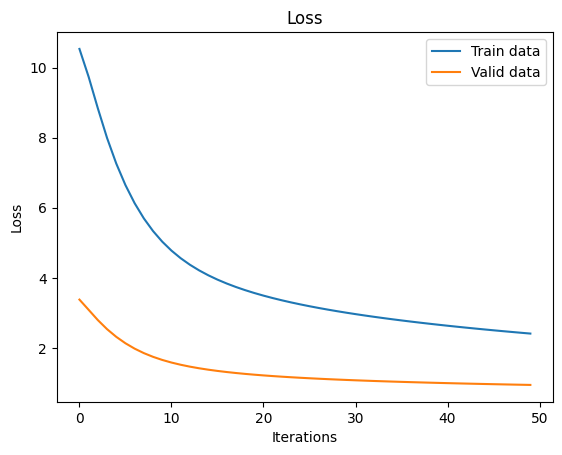

In [58]:
import math
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

for i in range(len(train_x)):
    x = np.random.randint(-6,6)
    y = np.random.randint(-6,6)
    ang = np.random.randint(-45,45)
    image = train_x[i].reshape(32,32, -1) 
    image = apply_random_translation(image, x, y)
    train_x[i] = apply_random_rotation(image, ang).ravel()
# apply_random_translation(image1, dx1, dy1)
# image1mod = apply_random_rotation(image1mod, angle1)

max_iters = 50
# pick a batch size, learning rate
batch_size = 3
learning_rate = 1e-3
# YOUR CODE HERE

# raise NotImplementedError()
hidden_size = 64

batches = get_random_batches(train_x,train_y,batch_size)
batch_num = len(batches)

params = {}

# initialize layers (named "layer1" and "output") here
# YOUR CODE HERE
initialize_weights(1024,hidden_size,params,'layer1')
initialize_weights(hidden_size,36,params,'output')
# raise NotImplementedError()
train_acc_arr = []
train_loss_arr = []
valid_acc_arr = []
valid_loss_arr = []
itr_arr = []
# with default settings, you should get loss < 150 and accuracy > 80%
for itr in range(max_iters):
    itr_arr.append(itr)
    total_loss = 0
    total_acc = 0
    valid_loss = 0
    valid_acc = 0
    for xb,yb in batches:
        
        # print("xb shape = ", xb.shape)
        # training loop can be exactly the same as q2!
        # YOUR CODE HERE

        post_act = forward(xb,params,'layer1',sigmoid)
        pred_output = forward(post_act,params,'output',softmax)
        # raise NotImplementedError()
        
        # loss
        # be sure to add loss and accuracy to epoch totals
        # YOUR CODE HERE
        loss, acc = compute_loss_and_acc(yb, pred_output)
        total_loss += loss/len(batches)
        total_acc += acc/len(batches)
        
        # raise NotImplementedError()
        
        # backward
        # YOUR CODE HERE
        last_layer_backprop = backwards(pred_output - yb, params, 'output', linear_deriv)
        hidden_layer_backprop  = backwards(last_layer_backprop, params, 'layer1', sigmoid_deriv)
        # raise NotImplementedError()

        # apply gradient
        # YOUR CODE HERE
        params['Woutput'] = params['Woutput'] - learning_rate*params['grad_Woutput']
        params['boutput'] = params['boutput'] - learning_rate*params['grad_boutput']
        params['Wlayer1'] = params['Wlayer1'] - learning_rate*params['grad_Wlayer1']
        params['blayer1'] = params['blayer1'] - learning_rate*params['grad_blayer1']
            
        # raise NotImplementedError()
    train_acc_arr.append(total_acc)
    train_loss_arr.append(total_loss)
    if itr % 2 == 0:
        print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(itr,total_loss,total_acc))

# run on validation set and report accuracy! should be above 70%
    
    post_act = forward(valid_x,params,'layer1',sigmoid)
    pred_output = forward(post_act,params,'output',softmax)
    # raise NotImplementedError()

    # loss
    # be sure to add loss and accuracy to epoch totals
    # YOUR CODE HERE
    loss, acc = compute_loss_and_acc(valid_y, pred_output)
    valid_loss += loss/len(batches)
    valid_acc += acc
    valid_acc_arr.append(valid_acc)
    valid_loss_arr.append(valid_loss)
    # raise NotImplementedError()
    print('Validation accuracy: ',valid_acc)
    

import matplotlib.pyplot as plt
plt.plot(itr_arr,train_acc_arr, label = "Train data")
plt.plot(itr_arr,valid_acc_arr, label = "Valid data")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(itr_arr,train_loss_arr, label = "Train data")
plt.plot(itr_arr,valid_loss_arr, label = "Valid data")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss")
plt.show()

In [ ]:
"""
This should look like your previous training loops.
"""

max_iters = 50
# pick a batch size, learning rate
batch_size = None
learning_rate = None
# YOUR CODE HERE
raise NotImplementedError()
hidden_size = 64

batches = get_random_batches(train_x,train_y,batch_size)
batch_num = len(batches)

params = {}

# initialize layers (named "layer1" and "output") here
# YOUR CODE HERE
raise NotImplementedError()


# with default settings, you should get loss < 150 and accuracy > 80%
for itr in range(max_iters):
    total_loss = 0
    total_acc = 0
    for xb,yb in batches:
        
        # training loop can be exactly the same as q2!
        # YOUR CODE HERE
        raise NotImplementedError()
    if itr % 2 == 0:
        print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(itr,total_loss,total_acc))

# run on validation set and report accuracy! should be above 75%
valid_acc = None
# YOUR CODE HERE
raise NotImplementedError()
print('Validation accuracy: ',valid_acc)

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from ipynb.fs.defs.q1 import *
import scipy.io
import torch.nn.functional as F

training_data = scipy.io.loadmat('data/nist36_train.mat')
train_x, train_y = training_data['train_data'], training_data['train_labels']
train_x, train_y = torch.from_numpy(train_x).float(),torch.from_numpy(train_y).float()

# load_train_data = DataLoader(TensorDataset(train_x, train_y))

batch_size = 8

# Create data loaders.
train_dataloader = DataLoader(TensorDataset(train_x, train_y), batch_size=batch_size, shuffle=True)

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.flatten = nn.Flatten()
#         self.linear_relu_stack = nn.Sequential(
#             nn.Linear(1024, 64),
#             nn.Sigmoid(),
#             nn.Linear(64, 36),
#             nn.Softmax(dim=1),
#             # nn.Linear(512, 10)
#         )

#     def forward(self, x):
#         x = self.flatten(x)
#         logits = self.linear_relu_stack(x)
#         return logits

# model = NeuralNetwork().to(device)

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1024, 64)
        self.output = nn.Linear(64, 36)
        
    def forward(self, x):
        x = self.hidden(x)
        x = torch.sigmoid(x)
        x = self.output(x)
        x = F.log_softmax(x,dim=1)
        
        return x


model = Network()

print(model)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=5e-3)

    
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    avg_acc = 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = nn.functional.cross_entropy(pred, y)
        _, acc = compute_loss_and_acc(y.detach().numpy(), pred.detach().numpy())
        avg_acc += acc/len(train_dataloader)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    
    print("Loss = ", loss)
    print("Acc = ", avg_acc)
    return avg_acc, loss.detach().numpy()


epochs = 50
acc_arr = []
loss_arr = []
itr_arr = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    acc, l = train(train_dataloader, model, loss_fn, optimizer)
    acc_arr.append(acc)
    loss_arr.append(l)
    itr_arr.append(t)
print("Done!")

import matplotlib.pyplot as plt
plt.plot(itr_arr,acc_arr, label = "Train data")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(itr_arr,loss_arr, label = "Train data")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss")
plt.show()